<a href="https://colab.research.google.com/github/phoebe-alexis/COVID_Prediction/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet


     -------------------------------------- 57.7/57.7 kB 189.7 kB/s eta 0:00:00
   ---------------------------------------- 13.3/13.3 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 83.2/83.2 kB 388.3 kB/s eta 0:00:00
   -------------------------------------- 598.5/598.5 kB 723.6 kB/s eta 0:00:00
   ---------------------------------------- 14.0/14.0 MB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 10.0/10.0 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 78.5/78.5 kB 546.4 kB/s eta 0:00:00
  Attempting uninstall: zipp
    Found existing installation: zipp 0.5.1
    Uninstalling zipp-0.5.1:
      Successfully uninstalled zipp-0.5.1
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:
      Successfully uninstalled tqdm-4.32.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  At

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "time_series_covid19_confirmed_US.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Aggregate data for the whole U.S.
df_cases = df.iloc[:, 11:].sum()  # Summing across all counties

# Convert to a time-series format for Prophet
df_timeseries = pd.DataFrame({
    'ds': pd.to_datetime(df_cases.index),  # Convert date columns to datetime format
    'y': df_cases.values  # Total confirmed cases per day
})

# Display the first few rows
df_timeseries.head()


C:\Users\RAFA\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5


In [ ]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet()
model.fit(df_timeseries)

# Create a future dataframe for predictions (next 180 days)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)


12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be remov

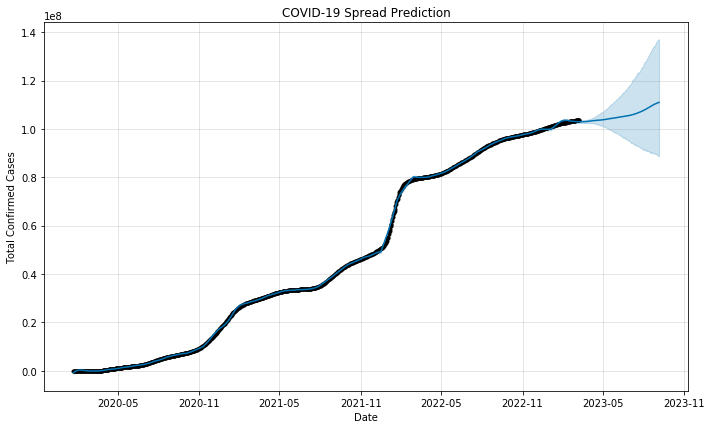

In [ ]:
# Plot the forecast
fig = model.plot(forecast)
plt.title("COVID-19 Spread Prediction")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.show()


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
1313,2023-08-27,1.102498e+08,8.966495e+07,1.347325e+08
1314,2023-08-28,1.103524e+08,8.972633e+07,1.350166e+08
1315,2023-08-29,1.104432e+08,8.949323e+07,1.356170e+08
1316,2023-08-30,1.105582e+08,8.959179e+07,1.360354e+08
1317,2023-08-31,1.106546e+08,8.943753e+07,1.361142e+08
1318,2023-09-01,1.107440e+08,8.958540e+07,1.363849e+08
1319,2023-09-02,1.107835e+08,8.888543e+07,1.366670e+08
1320,2023-09-03,1.108149e+08,8.908568e+07,1.367606e+08
1321,2023-09-04,1.109045e+08,8.898299e+07,1.370220e+08
1322,2023-09-05,1.109835e+08,8.858289e+07,1.371023e+08


C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be remov

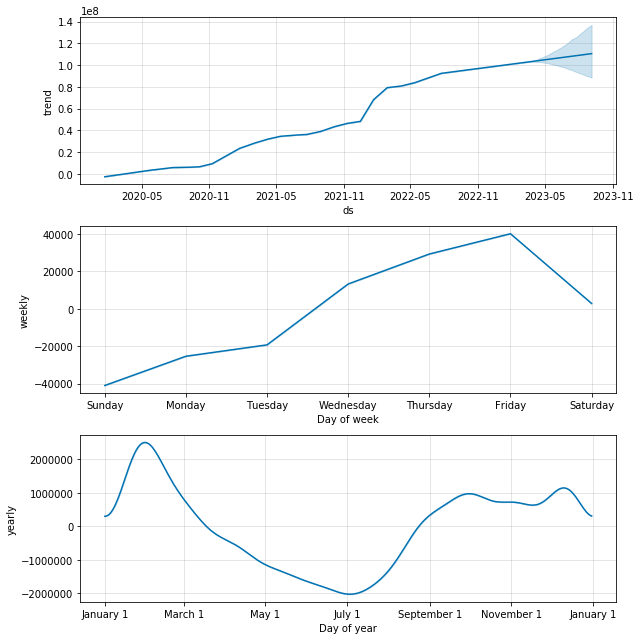

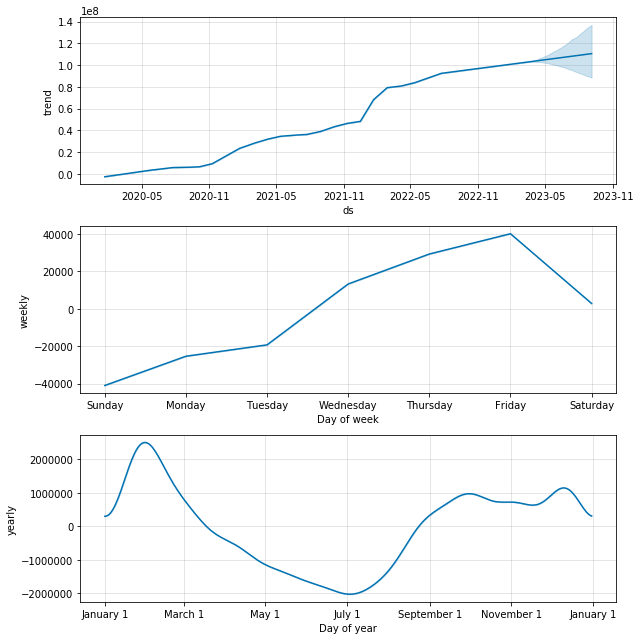

In [ ]:
model.plot_components(forecast)



In [ ]:
forecast.to_csv("covid_forecast_results.csv", index=False)
print("Forecast saved as 'covid_forecast_results.csv'.")


Forecast saved as 'covid_forecast_results.csv'.


12:56:05 - cmdstanpy - INFO - Chain [1] start processing
12:56:06 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py

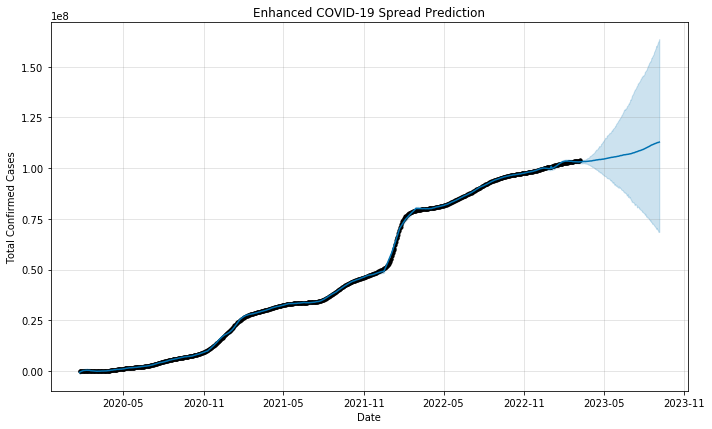

C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\RAFA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be remov

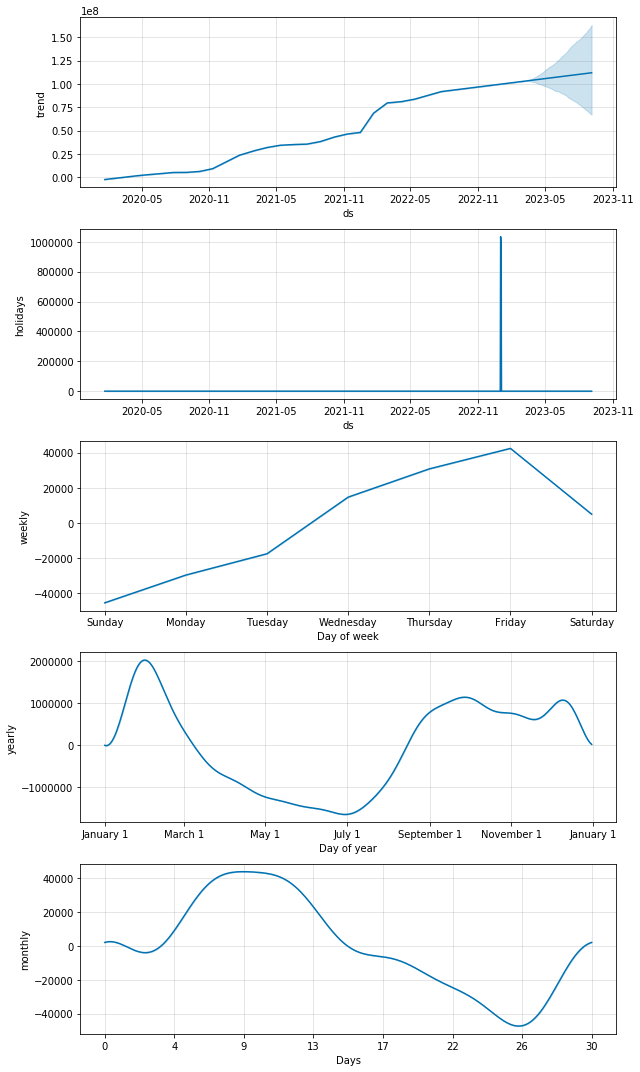

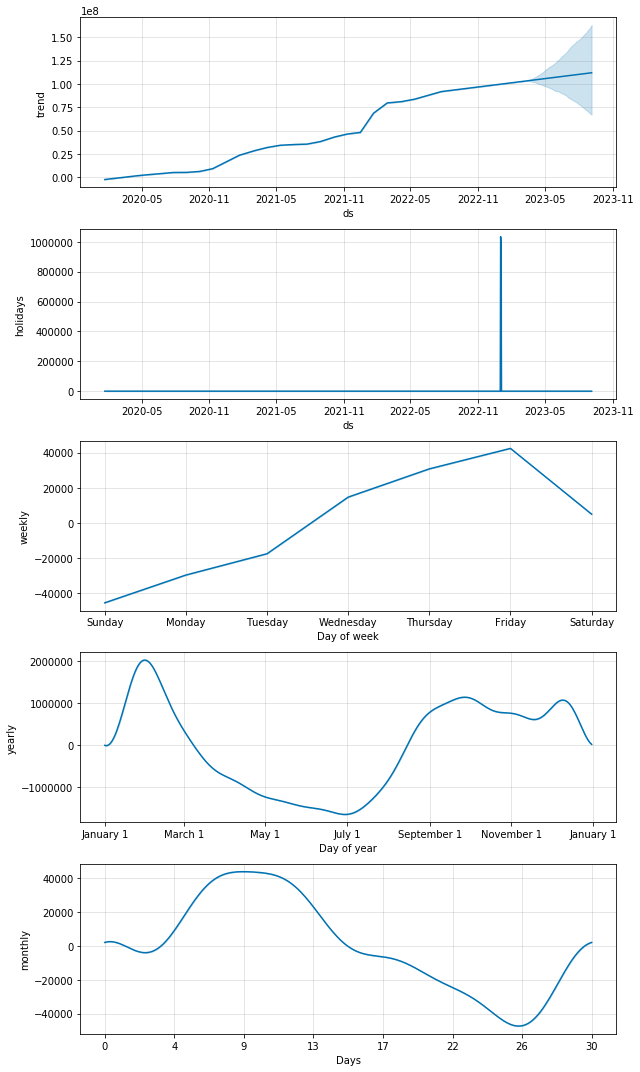

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
file_path = "time_series_covid19_confirmed_US.csv"
df = pd.read_csv(file_path)
df_cases = df.iloc[:, 11:].sum()

# Prepare time-series data
df_timeseries = pd.DataFrame({
    'ds': pd.to_datetime(df_cases.index),
    'y': df_cases.values
})

# Define major holidays
holidays = pd.DataFrame({
    'holiday': ['New Year', 'Independence Day', 'Thanksgiving', 'Christmas'],
    'ds': pd.to_datetime(['2023-01-01', '2023-07-04', '2023-11-23', '2023-12-25']),
    'lower_window': 0,
    'upper_window': 1
})

# Initialize Prophet with holidays, change points, and seasonality
model = Prophet(holidays=holidays, changepoint_prior_scale=0.1, interval_width=0.95)
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(df_timeseries)

# Predict next 180 days
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Enhanced COVID-19 Spread Prediction")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.show()

# Show forecast components
model.plot_components(forecast)
